# Coursework 1
**Replace CID in the file name with your CID**

# Outline


- [Task 1](#task-1): Linear regression and feature selection <a name="index-task-1"></a>
  - [(1.1)](#task-11) <a name="index-task-11"></a>
  - [(1.2)](#task-12) <a name="index-task-12"></a>
  - [(1.3)](#task-13) <a name="index-task-13"></a>
  - [(1.4)](#task-14) <a name="index-task-14"></a>
- [Task 2](#task-2): Non-linear regression with Kernel Ridge Regression <a name="index-task-2"></a>
  - [(2.1)](#task-21) <a name="index-task-21"></a>
  - [(2.2)](#task-22)  <a name="index-task-22"></a>
- [Task 3](#task-3): Classification with the Multi-Layer Perceptron <a name="index-task-3"></a>
  - [(3.1)](#task-31) <a name="index-task-31"></a>
  - [(3.2)](#task-32)  <a name="index-task-32"></a>



---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

rng = np.random.default_rng(0)

<a name="task-1"></a>

# Task 1: Linear regression and feature selection [(index)](#index-task-1)

<a name="task-11"></a>

## (1.1) [(index)](#index-task-11)

In [2]:
## EDIT THIS FUNCTION
def standardise(X, X_train_=None):
    """Standardise features.

    Parameters:
        X (np.array): Feature matrix.
        X_train_ (np.array): An optional feature matrix to compute the statistics
            from before applying it to X. If None, just use X to compute the statistics.

    Returns:
        X_std (np.array): Standardised feature matrix
    """
    if X_train_ is None:
        X_train_ = X

    mu = np.mean(X_train_, axis=0, keepdims=True)
    sigma = np.std(X_train_, axis=0, keepdims=True)
    X_std = (X - mu) / sigma
    return X_std

In [3]:
def basic_graph(x, ys, labels, *, xlog=False, ylog=False, symlog=False, xlabel=None, ylabel=None):
    plt.figure()
    for i, y in enumerate(ys.T):
        plt.plot(x, y, markersize=10, label=labels[i])
    plt.xlabel("x")
    plt.ylabel("y")
    if xlog:
        plt.xscale("log")
    if ylog:
        plt.yscale("log")
    if symlog:
        plt.yscale("symlog", linthresh=0.1)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [4]:
def r2_score(y, y_hat):
    """R^2 score to assess regression performance."""

    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y = y.reshape(y_hat.shape)
    y_bar = y.mean()

    ss_tot = ((y - y_bar)**2).sum()
    ss_res = ((y - y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)

In [5]:
def ls(x_train, y):
    assert x_train.shape[0] == y_train.shape[0], "x_train and y_train must have same size"
    X = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
    XX = X.T @ X
    Xy = X.T @ y
    return np.linalg.inv(XX) @ Xy

In [6]:
def garrote(x_train, y_train, lambd, n_iters=10000, step_size=10**(-7), c_huber=10**(-4)):

    assert x_train.shape[0] == y_train.shape[0], "x_train and y_train must have same size"


    n, p = x_train.shape

    ls_coeffs = ls(x_train, y_train)
    g = np.zeros(p)

    beta_ls_0 = ls_coeffs[0]
    beta_ls = ls_coeffs[1:]

    # redefinitions of y_hat and X_hat so scheme can work with LASSO definition
    y_hat = (1 / np.sqrt(n)) * (y_train - beta_ls_0)
    X_hat = (1 / np.sqrt(n)) * (x_train @ np.diag(beta_ls))

    for i in range(n_iters):
        grad_c = grad_huber(g, c_huber)
        grad_c[0] = 0

        grad = 2 * (X_hat.T @ X_hat @ g - X_hat.T @ y_hat) + lambd * grad_c

        g -= step_size * grad

    return g, beta_ls

In [7]:
def huber(beta, c=10**(-6)):
    return np.where(np.abs(beta) <= c, (beta**2)/2, c * (np.abs(beta) - c/2))

def grad_huber(beta, c=10**(-6)):
    g = np.empty_like(beta)
    return np.where(np.abs(beta) < c, beta, c * np.sign(beta))

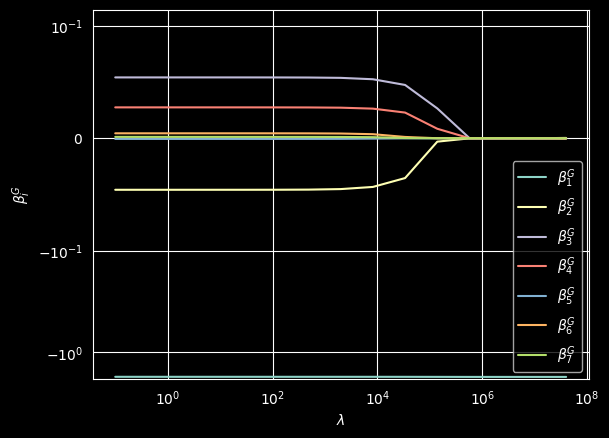

In [8]:
test_df = pd.read_csv('asteroid_observations_test.csv')
train_df = pd.read_csv('asteroid_observations_train.csv')

lambdas = np.logspace(-1, 7.6, 15)

x_train_u = train_df.to_numpy()[:, :7].astype(float)
y_train = train_df.to_numpy()[:, 7].astype(float)
x_test_u = test_df.to_numpy()[:, :7].astype(float)
y_test = test_df.to_numpy()[:, 7].astype(float)

x_train = standardise(x_train_u)
x_test = standardise(x_test_u, X_train_=x_train_u)

beta_mat = np.zeros((15, 7))

for i, lambd in enumerate(lambdas):
    garrote_constants, betas = garrote(x_train, y_train, lambd)
    beta_g = np.diag(betas) @ garrote_constants
    beta_mat[i, :] = 1.0 * beta_g

basic_graph(lambdas, beta_mat, labels=[rf"$\beta^G_{i+1}$" for i in range(7)], xlog=True, symlog=True, xlabel=r"$\lambda$", ylabel=r"$\beta^G_i$")

answer here

<a name="task-12"></a>

## (1.2) [(index)](#index-task-12)

<a name="task-13"></a>

## (1.3) [(index)](#index-task-13)

<a name="task-14"></a>

## (1.4) [(index)](#index-task-14)

<a name="task-2"></a>

# Task 2: Non-linear regression with Kernel Ridge Regression [(index)](#index-task-2)

<a name="task-21"></a>

## (2.1) [(index)](#index-task-21)

In [9]:
def ridge_est(x_train, y_train, lambd=0.1):
    """
    """

    m, n = x_train.shape
    assert y_train.shape[0] == m, "x_train and y_train must have same size"

    x_aug = np.hstack([np.ones((m, 1)), x_train])
    I = np.identity(n)
    I[0] = 0.0
    beta = np.linalg.inv(x_aug.T @ x_aug + lambd * np.eye(n)) @ x_aug.T @ y_train
    return beta

<a name="task-22"></a>

## (2.2) [(index)](#index-task-22)

<a name="task-3"></a>

# Task 3: Classification with the Multi-Layer Perceptron [(index)](#index-task-3)

<a name="task-31"></a>

## (3.1) [(index)](#index-task-31)

In [10]:
x_train_u = train_df.to_numpy()[:, :7].astype(float)
x_test_u = test_df.to_numpy()[:, :7].astype(float)

onehot_dict = {"MBA": np.array([1.0, 0, 0]),
               "TJN": np.array([0, 1.0, 0]),
               "OMB": np.array([0, 0, 1.0])}

y_train = np.array([onehot_dict[label] for label in train_df.to_numpy()[:, 8]])
y_test = np.array([onehot_dict[label] for label in test_df.to_numpy()[:, 8]])

x_train = standardise(x_train_u)
x_test = standardise(x_test_u, X_train_=x_train_u)

In [11]:
## EDIT THIS FUNCTION
def dense(X, W, b):
    """Full-connected MLP layer.

    Parameters:
        X (np.ndarray): K x h_in array of inputs, where K is the batch size and h_in is the input dimension.
        W (np.ndarray): h_out x h_in array for weights matrix parameters, where h_out is the output dimension.
        b (np.ndarray): Length h_out 1-D array for bias parameters

    Returns:
        a (np.ndarray): K x h_out array of pre-activations
    """
    a = np.vstack([W @ x + b for x in X]) ## <-- SOLUTION
    return a

## EDIT THIS FUNCTION
def relu_activation(a):
    """ReLU activation function.

    Parameters:
        a: K x h_out array of pre-activations

    Returns:
        h: K x h_out array of post-activations
    """
    # compute post-activations
    h = np.maximum(a, 0.)  ## <-- SOLUTION
    return h

## EDIT THIS FUNCTION
def grad_relu_activation(a):
    """Gradient of ReLU activation function.

    Parameters:
        a: K x h_out array of pre-activations

    Returns:
        grad: K x h_out gradient array of post-activations
    """
    # compute gradient
    grad = np.zeros_like(a) ## <-- SOLUTION
    grad[a>0] = 1 ## <-- SOLUTION
    return grad

def softmax(a):
    a -= np.max(a) * np.ones_like(a)
    return np.exp(a) / np.sum(np.exp(a), axis=1, keepdims=True)

def mse_loss(y_true, y_pred):
    """Compute MSE-loss

    Parameters:
        y_true: ground-truth array, with shape (K, )
        y_pred: predictions array, with shape (K, )

    Returns:
        loss (float): MSE-loss
    """
    assert y_true.shape == y_pred.shape, "Ground-truth and predictions have different dimensions."

    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y_true = y_true.reshape(y_pred.shape)

    # Compute MSE loss
    loss = np.mean((y_true - y_pred)**2, keepdims=True)
    return loss

def grad_mse_loss(y_true, y_pred):
    """Compute gradient of MSE-loss

    Parameters:
        y_true: ground-truth values, shape: (K, ).
        y_pred: prediction values, shape: (K, ).

    Returns:
        grad (np.ndarray): Gradient of MSE-loss, shape: (K, ).
    """
    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y_true = y_true.reshape(y_pred.shape)

    # Compute gradient of MSE loss
    grad = 2.0 * (y_pred - y_true) / y_true.size
    return grad

def cross_entropy_loss(y, y_hat):
    y_hat_soft = softmax(y_hat)
    loss = -np.sum(y * np.log(y_hat_soft))
    return loss

def grad_cross_entropy_loss(y, y_hat):
    y_hat_soft = softmax(y_hat)
    return y_hat_soft - y

# A lookup table for activation functions by their names.
activation_table = {
    "relu": relu_activation,
    # Identity function.
    "identity": lambda x: x
}

# A lookup table for gradient of activation functions by their names.
grad_activation_table = {
    "relu": grad_relu_activation,
    # Identity function gradient.
    "identity": lambda x: np.ones_like(x)
}

training_table = {
    "mse": mse_loss,
    "ce": cross_entropy_loss
}

grad_training_table = {
    "mse": grad_mse_loss,
    "ce": grad_cross_entropy_loss
}

class MLP:
    """
    This class represents a Multi-Layer Perceptron (MLP), that we are going
    to use to encapsulate two components:
        1. layers: the sequence of layers, where each layer is stored in
            a dictionary in the format {"W": np.ndarray, "b": np.ndarray},
            where "W" points to the weights array, and "b" points to
            the bias vector.
        2. rng: a pseudo random number generator (RNG) initialised to generate
            the random weights in a reproducible manner between different
            runtime sessions.
    This class is also shipped with methods that perform essential operations
    with a MLP, including:
        - add_layers: which creates a new layer with specified dimensions.
        - predict: applies the MLP forward pass to make predictions and produces
            a computational graph for the forward pass that can be used to
            compute gradients using backpropagation algorithm.
        in addition to other light functions that return simple statistics about
        the MLP.
    """
    def __init__(self, seed=42):
        self.layers = []
        self.rng = np.random.default_rng(seed)

    def n_parameters(self):
        """Return the total number of parameters of weights and biases."""
        return sum(l["b"].size + l["W"].size for l in self.layers)

    def n_layers(self):
        """Return current number of MLP layers (including input and output)."""
        return len(self.layers) + 1 if len(self.layers) > 0 else 0

    def layer_dim(self, index):
        """Retrieve the dimensions of the MLP layer at `index`."""
        return self.layers[index]["W"].shape

    def add_layer(self, in_dim, out_dim, activation="identity"):
        """Add fully connected layer to MLP.

        Parameters:
            in_dim (int): The input dimension of the layer.
            out_dim (int): The output dimension of the layer.
            activation (str): The activation function name.
        """
        # check if input-dimension matches output-dimension of previous layer
        if self.n_layers() > 0:
            last_out_dim, _ = self.layer_dim(-1)
            assert in_dim == last_out_dim, f"Input-dimension {in_dim} does not match output-dimension {last_out_dim} of previous layer."

        # the first layer, in our convention illustrated, does not apply activation on the input features X.
        if self.n_layers() == 0:
            assert activation == "identity", "Should not apply activations on the input features X, use Identity function for the first layer."


        # store each layer as a dictionary in the list, as shown in the
        # attached diagram.
        self.layers.append({
            # only for debugging.
            "index": len(self.layers),
            # apply Glorot initialisation for weights.
            # hint: use self.rng.normal()
            "W": self.rng.normal(size=(out_dim, in_dim)) * np.sqrt(2. / (in_dim + out_dim)),
            # initialise bias vector with zeros.
            "b": np.zeros(out_dim),
            # store the activation function (as string)
            "activation": activation
        })

    def predict(self, X):
        """Apply the forward pass on the input X and produce prediction and the
        forward computation graph.

        Parameters:
            X (np.ndarray): Feature matrix.

        Returns:
            (np.ndarray, List[Dict[str, np.ndarray]]): A tuple of the
            predictions and the computation graph as a sequence of intermediate
            values through the MLP, specifically each layer will have a corresponding
            intermediate values {"a": np.ndarray, "h": np.ndarray}, as shown in the
            attached diagram above.
        """
        # We assume that we work with a batch of examples (ndim==2).
        if X.ndim == 1:
            # If one example passed, add a dummy dimension for the batch.
            X = X.reshape(1, -1)

        # store pre- and post-activations in list
        forward_pass = [{"index": 0, "a": X, "h": X}]

        # iterate through hidden layers
        for k in range(1, len(self.layers)):
            # compute pre-activations
            a = dense(forward_pass[k - 1]["h"], self.layers[k - 1]["W"], self.layers[k - 1]["b"])
            activation = activation_table[self.layers[k]["activation"]]
            forward_pass.append({"index": k, "a" : a, "h" : activation(a)})

        y_hat = dense(forward_pass[-1]["h"], self.layers[-1]["W"], self.layers[-1]["b"])
        # predicted target is output of last layer
        return y_hat, forward_pass

def backpropagate(layers, forward_pass, delta_output):
    """
    Apply the backpropagation algorithm to the MLP layers to compute the gradients starting from
    the output layer to the input layer, and starting the chain rule from the
    partial derivative of the loss function w.r.t the predictions $\hat{y}$

    Parameters:
        layers (List[Dict[str, np.ndarray]]): The MLP sequence of layers, as shown in the diagrams.
        forward_pass (List[Dict[str, np.ndarray]]): The forward pass intermediate values for
            each layer, representing a computation graph.
        delta_output (np.ndarray): the partial derivative of the loss function w.r.t the
            predictions $\hat{y}$, has the shape (K, 1), where K is the batch size.
    Returns:
        gradients (List[Dict[str, np.ndarray]]): The computed gradient using a structure symmetric in the layers, as shown
            in the diagrams.

    """
    # Create a list that will contain the gradients of all the layers.
    gradients = []

    # Initialise delta.
    delta = delta_output

    assert len(layers) == len(forward_pass), "Number of layers is expected to match the number of forward pass layers"

    # Iterate on layers backwardly, from output to input.
    # Calculate gradients w.r.t. weights and biases of each level and store in list of dictionaries.
    for layer, forward_computes in reversed(list(zip(layers, forward_pass))):   # zip iterates through pairs of layers and forward_pass
        assert forward_computes["index"] == layer["index"], "Mismatch in the index."

        h = forward_computes["h"]
        assert delta.shape[0] == h.shape[0], "Mismatch in the batch dimension."

        # Gradients are average gradients over batch
        gradients.append({"W" : (delta.T @ h) / h.shape[0],
                          "b" : delta.mean(axis=0)})

        # Update the delta for the next iteration
        grad_activation_f = grad_activation_table[layer["activation"]]
        grad_activation = grad_activation_f(forward_computes["a"])

        # Calculate the delta for the backward layer.
        delta = np.stack([np.diag(gi) @ layer["W"].T @ di
                           for (gi, di) in zip(grad_activation, delta)])


    # Return now ordered list matching the layers.
    gradients = list(reversed(gradients))
    return gradients

def sgd_step(X, y, mlp, learning_rate = 1e-3, fun = "mse"):
    """
    Apply a stochastic gradient descent step using the sampled batch.
    Parameters:
        X (np.ndarray): The input features array batch, with dimension (K, p).
        y (np.ndarray): The ground-truth of the batch, with dimension (K, 1).
        learning_rate (float): The learning rate multiplier for the update steps in SGD.
    Returns:
        updated_layers (List[Dict[str, np.ndarray]]): The updated layers after applying SGD.
    """
    # Compute the forward pass.
    y_hat, forward_pass = mlp.predict(X)

    # Compute the partial derivative of the loss w.r.t. to predictions `y_hat`.
    delta_output = grad_training_table[fun](y, y_hat)

    # Apply backpropagation algorithm to compute the gradients of the MLP parameters.
    gradients = backpropagate(mlp.layers, forward_pass, delta_output)

    # mlp.layers and gradients are symmetric, as shown in the figure.
    updated_layers = []
    for layer, grad in zip(mlp.layers, gradients):
        W = layer["W"] - learning_rate * grad["W"]
        b = layer["b"] - learning_rate * grad["b"]
        updated_layers.append({"W": W, "b": b,
                               # keep the activation function.
                               "activation": layer["activation"],
                               # We use the index for asserts and debugging purposes only.
                               "index": layer["index"]})
    return updated_layers

def sgd(X_train, y_train, X_test, y_test, mlp, learning_rate = 1e-3,
        n_epochs=10, minibatchsize=1, seed=42, fun = "mse"):
    """
    Run the Stochastic Gradient Descent (SGD) algorithm to optimise the parameters of MLP model to fit it on
    the training data using MSE loss.

    Parameters:
        X_train (np.ndarray): The training data features, with shape (N^{training}, p).
        y_train (np.ndarray): The training data ground-truth, with shape (N^{training}, 1).
        X_test (np.ndarray): The testing data features, with shape (N^{test}, p).
        y_test (np.ndarray): The testing data ground-truth, with shape (N^{test}, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        learning_rate (float): The learning_rate multiplier used in updating the parameters at each iteration.
        n_epochs (int): The number of training cycles that each covers the entire training examples.
        minibatchsize (int): The batch size used in each SGD step.
        seed (int): A seed for the RNG to ensure reproducibility across runtime sessions.

    Returns:
        mlp (MLP): MLP object encapuslating the trained MLP model.
        losses_train (np.ndarray): Train losses over epochs.
        losses_tset (np.ndarray): Test losses over epochs.
    """

    # get random number generator
    rng = np.random.default_rng(seed)

    # compute number of iterations per epoch
    n_iterations = int(len(y_train) / minibatchsize)

    # store losses
    losses_train = []
    losses_test = []

    for i in range(n_epochs):

        # shuffle data
        p = rng.permutation(len(y_train))
        X_train_shuffled = X_train[p]
        y_train_shuffled = y_train[p]

        for j in range(n_iterations):
            # get batch
            X_batch = X_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]
            y_batch = y_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]

            # apply sgd step
            updated_layers = sgd_step(X_batch, y_batch, mlp, learning_rate, fun)

            # update weights and biases of MLP
            mlp.layers = updated_layers

        # compute loss at the end of each epoch
        y_hat_train, _ = mlp.predict(X_train)
        loss_train = training_table[fun](y_train, y_hat_train).squeeze()
        losses_train.append(loss_train)

        y_hat_test, _ = mlp.predict(X_test)
        loss_test = training_table[fun](y_test, y_hat_test).squeeze()
        losses_test.append(loss_test)

        if (i==0) or ((i+1)%(n_epochs//10)==0):
          print(
              f'Epoch {i+1}/{n_epochs}: In-sample error: {loss_train}, Out-of-sample error: {loss_test}'
               )

    return mlp, losses_train, losses_test


<>:223: SyntaxWarning: "\h" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\h"? A raw string is also an option.
<>:223: SyntaxWarning: "\h" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\h"? A raw string is also an option.
/tmp/ipykernel_22372/3221146539.py:223: SyntaxWarning: "\h" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\h"? A raw string is also an option.
  partial derivative of the loss function w.r.t the predictions $\hat{y}$


In [12]:
mlp = MLP(seed=2)
mlp.add_layer(7, 64)
mlp.add_layer(64, 64, "relu")
mlp.add_layer(64, 32, "relu")
mlp.add_layer(32, 3, "relu")

mlp, losses_train, losses_test = sgd(x_train, y_train, x_test, y_test, mlp, learning_rate=0.04, n_epochs=500, minibatchsize=64, seed=42, fun="ce")

Epoch 500/500: In-sample error: 24.793260260654, Out-of-sample error: 18.69462315978408


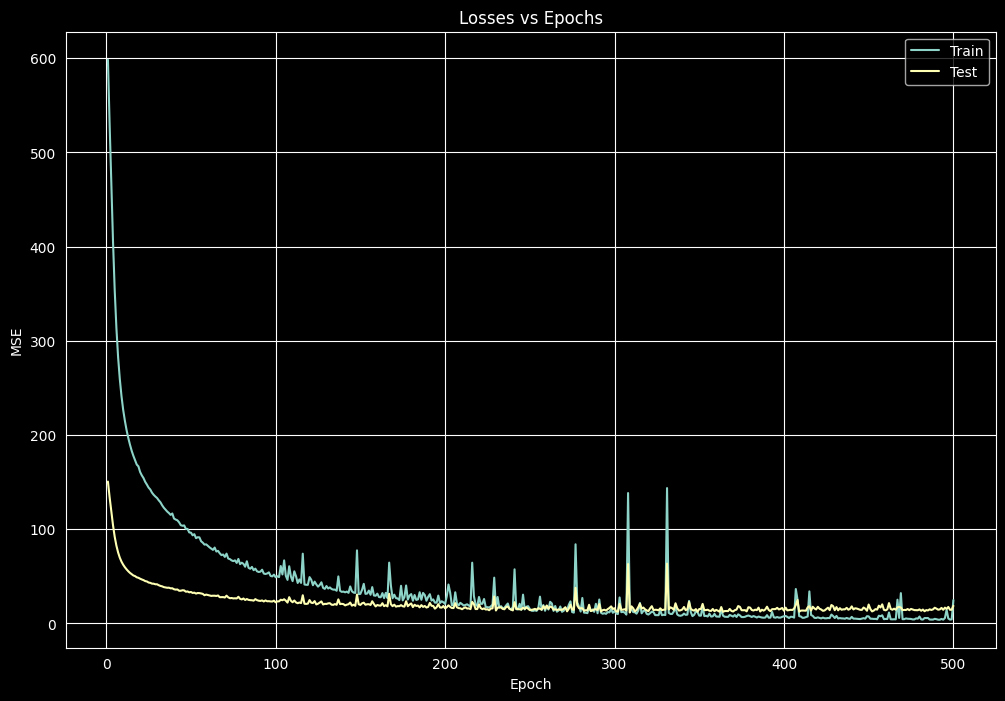

In [13]:
# plot training progress
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(1,501),losses_train, label="Train")
ax.plot(np.arange(1,501),losses_test, label="Test")
ax.set(title="Losses vs Epochs", xlabel = "Epoch", ylabel = "MSE")
ax.legend()
plt.show()

In [14]:
def class_accuracy(y_softmax, y_test):
    classes = (np.where(np.all(y_test == [1, 0, 0],axis=1))[0], np.where(np.all(y_test == [0, 1, 0],axis=1))[0], np.where(np.all(y_test == [0, 0, 1],axis=1))[0])

    realisation = np.zeros_like(y_softmax)
    for i in range(y_softmax.shape[0]):
        realisation[i, np.random.choice(3, p=y_softmax[i, :])] = 1


    for j, q in enumerate(classes):
        count = 0
        for i in q:
            if np.all(realisation[i, :] == y_test[i, :]):
                count += 1
        acc_q = count / len(q)
        print(f"class {j + 1}: {acc_q}")

y_pred, _ = mlp.predict(x_test)
class_accuracy(softmax(y_pred), y_test)

class 1: 0.9622641509433962
class 2: 1.0
class 3: 0.8596491228070176


<a name="task-32"></a>

## (3.2) [(index)](#index-task-32)

In [26]:
def train_weak_model(x_train, y_train, x_test, y_test):
    mlp = MLP(seed=2)
    mlp.add_layer(7, 32)
    mlp.add_layer(32, 32, "relu")
    mlp.add_layer(32, 16, "relu")
    mlp.add_layer(16, 3, "relu")

    mlp, _, _ = sgd(x_train, y_train, x_test, y_test, mlp, learning_rate=0.05, n_epochs = 1000, minibatchsize=32, seed=42, fun="mse")

    return mlp

In [27]:
y_pred_train_raw, _ = mlp.predict(x_train)
y_pred_test_raw, _ = mlp.predict(x_test)

y_pred_train = softmax(y_pred_train_raw)
y_pred_test = softmax(y_pred_test_raw)

pr_train = y_pred_train - y_train # difference between predicted values and actual values (pseudoresidual)
pr_test = y_pred_test - y_test

for i in range(4):
    mlp_weak = train_weak_model(x_train, pr_train, x_test, pr_test)

    predicted_train_residuals, _ = mlp_weak.predict(x_train)
    predicted_test_residuals, _ = mlp_weak.predict(x_test)

    y_pred_train += predicted_train_residuals
    y_pred_test += predicted_test_residuals

    pr_train = y_pred_train - y_train
    pr_test = y_pred_test - y_test





Epoch 1000/1000: In-sample error: 0.008541260608278017, Out-of-sample error: 0.022933305704070886
